In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
import sklearn
print(sklearn.__version__)


1.7.1


In [3]:
!pip install -U scikit-learn


In [5]:
print(sklearn.__version__)

1.7.1


In [9]:
calif_housing = datasets.fetch_california_housing(as_frame=True)
ds = calif_housing.frame
ds.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
6611,5.9009,52.0,7.287755,1.040816,1434.0,2.926531,34.18,-118.11,3.760
8553,3.9375,28.0,4.907834,0.990783,887.0,4.087558,33.74,-118.30,2.705
4825,2.0658,29.0,3.575439,1.014035,2070.0,3.631579,34.04,-118.31,2.146
17951,3.4375,34.0,5.293478,1.083333,739.0,2.677536,37.34,-121.96,2.526
14105,1.0617,15.0,3.387413,1.082517,2120.0,2.965035,32.75,-117.10,0.924
20030,3.2500,19.0,5.800469,1.011737,1040.0,2.441315,36.08,-119.03,0.806
6243,3.7454,35.0,5.629808,1.024038,2176.0,5.230769,34.05,-117.98,1.569
11238,3.7070,29.0,5.084112,1.093458,1632.0,3.813084,33.82,-117.96,1.804
2242,2.3667,11.0,4.559603,1.097682,1328.0,2.198675,36.83,-119.78,0.693
14033,2.6818,35.0,4.388013,1.037855,726.0,2.290221,32.75,-117.14,1.594


In [10]:
ave_rooms_list = ds["AveRooms"].values.tolist()
ave_rooms_array = ds["AveRooms"].values
ave_rooms_frame = ds["AveRooms"]


ave_bedrooms_list = ds["AveBedrms"].values.tolist()
ave_bedrooms_array = ds["AveBedrms"].values
ave_bedrooms_frame = ds["AveBedrms"]

#Covarianceni hisoblash funksiyasi

In [11]:
def calculate_covariance(ave_bedrooms_list, ave_rooms_list):
  if len(ave_bedrooms_list) != len(ave_rooms_list):
    raise ValueError("Input lists must have the same length")

  n = len(ave_rooms_list)
  mean_bedrooms = sum(ave_bedrooms_list) / n
  mean_rooms = sum(ave_rooms_list) / n
  covariance = sum((ave_bedrooms_list[i]-mean_bedrooms)*(ave_rooms_list[i]-mean_rooms) for i in range(n))/n
  return covariance

calculate_covariance(ave_bedrooms_list, ave_rooms_list)

0.9938196481692929

#Correlationni hisoblash funsiyasi

In [27]:
def calculating_correlation(X, Y):
    if len(X) != len(Y):
        raise ValueError("Input lists must have the same length")

    n = len(X)
    mean_X = sum(X) / n
    mean_Y = sum(Y) / n

    cov = sum((X[i] - mean_X) * (Y[i] - mean_Y) for i in range(n)) / n

    std_X = (sum((x - mean_X)**2 for x in X) / n)**0.5
    std_Y = (sum((y - mean_Y)**2 for y in Y) / n)**0.5

    if std_X == 0 or std_Y == 0:
        raise ValueError("Standard deviation cannot be zero")

    correlation = cov / (std_X * std_Y)
    return correlation

result = calculating_correlation(ave_bedrooms_list, ave_rooms_list)
print(result)


0.847621325713045


In [28]:
#data frame

ds[["AveRooms", "AveBedrms"]].corr()

,AveRooms,AveBedrms
AveRooms,1.000000,0.847621
AveBedrms,0.847621,1.000000


[0.83191699 0.81312236 0.84079809 ... 0.84078164 0.83126466 0.83378501]


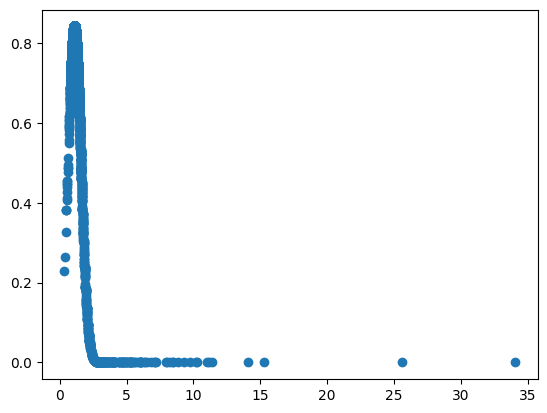

In [37]:
def calculate_pdf_vectorized(data):
  mu = np.mean(data)
  sigma = np.std(data, ddof=1)
  coeff = (1 / (sigma * np.sqrt(2 * np.pi)))
  exponent = np.exp(-(data - mu) ** 2 / (2 * sigma ** 2))

  return coeff * exponent

pdf_value = calculate_pdf_vectorized(ave_bedrooms_array)
print(pdf_value)
plt.scatter(ave_bedrooms_array, pdf_value)
#plt.bar(ave_rooms_array, pdf_value)

#Min-max scaling

In [34]:
def min_max(array):
  min_value = np.min(array)
  max_value = np.max(array)
  return (array - min_value) / (max_value - min_value)

min_max(ave_bedrooms_array)

array([0.02046866, 0.01892926, 0.02194011, ..., 0.0233229 , 0.02485928,
       0.02457305])